In [17]:
from docs.quant.heat_equation.HeatSolver import *

## Heat Equation

\begin{equation}
  \frac{\partial y}{\partial t} = \sigma (t,x) \frac{\partial^2 y}{\partial x^2}
\end{equation}

$\sigma(t,x)$ is an arbitrary function.
Firstly, lets assume, that $\sigma (t,x) = \Sigma$ = const.

## Middle-stage problem

Evaluate $ \frac{\partial y}{\partial \sigma} $ via Adjoint method (and compare it to one calculated with finite differences)


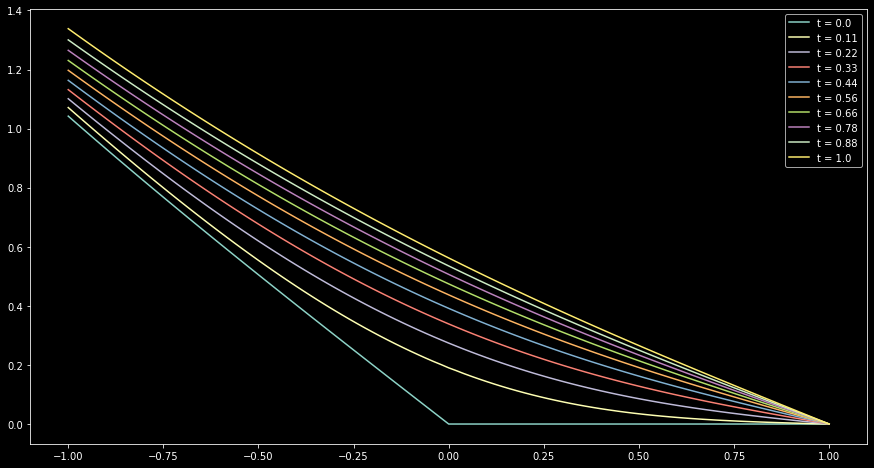

In [18]:
# solving Heat equation with constant sigma = 1
solver = HeatSolver(100, 200, xLeft=-1, xRight=1)
solver.CN()
solver.backup()
solver.plot(slice_num=10)

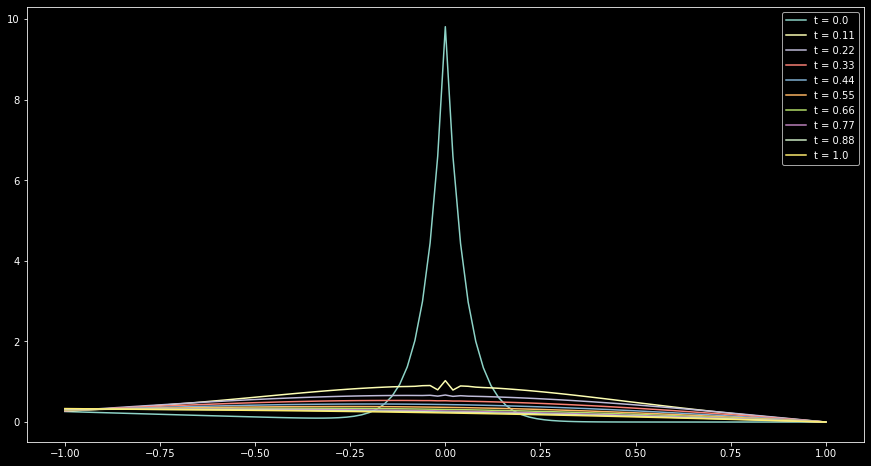

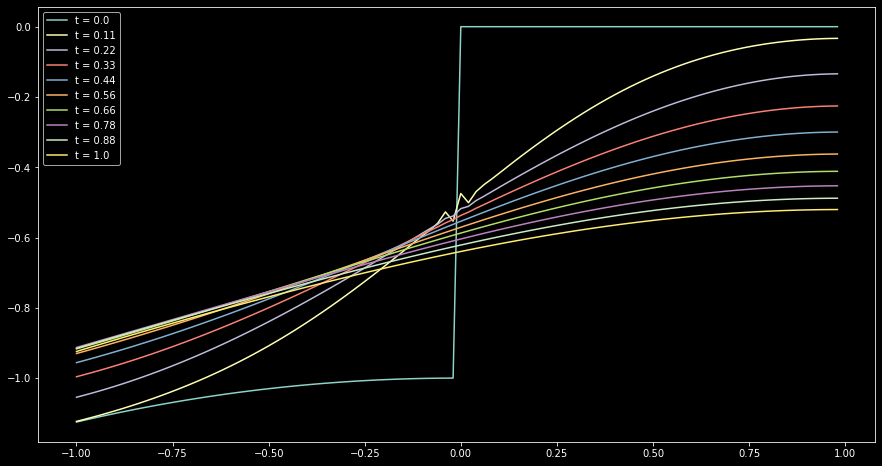

12.5
0.0125


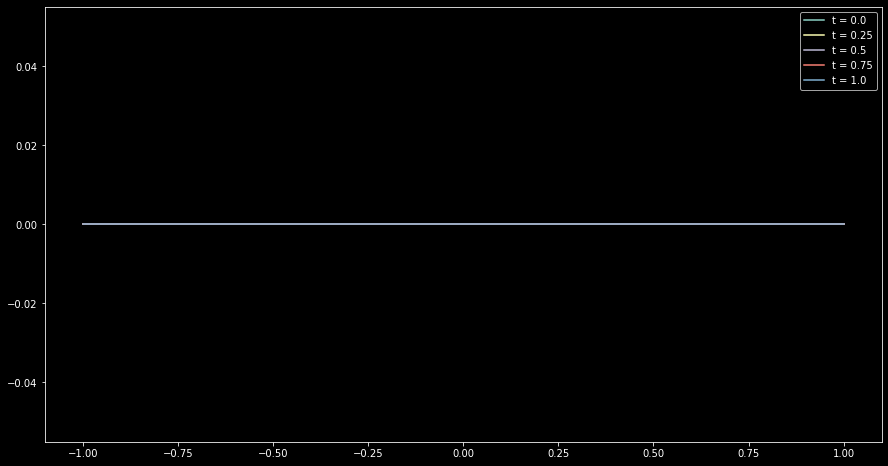

In [19]:
# sensitivity by time
solver.diff_t()
solver.plot(slice_num=10, mod=Mode.DIFF_T)
# sensitivity by x
solver.diff_x()
solver.plot(slice_num=10, mod=Mode.DIFF_X)
# sensitivity by sigma
solver.diff_sigma()
solver.plot(mod=Mode.DIFF_C)

## Obstacle Problem
#### "Free Boundary Problem"

Consider an "obstacle" $g$ satisfying $b$ $g>0$ for a subinterval of $-1<x<1, g \in C^2, g^{\prime \prime} \leq 0, g(-1)<0$ and $g(1)<0$.
A function $y \in C^1$ with minimal length, and with $y(-1)=y(1)=0$ and $y \geq g$ for the $g$ of the figure can be characterized as follows: There is $\alpha, \beta$ such that
$$
\begin{array}{rll}
-1<x<\alpha: & y^{\prime \prime}=0 & (y>g) \\
\alpha<x<\beta: & y=g & \left(y^{\prime \prime}=g^{\prime \prime} \leq 0\right) \\
\beta<x<1: & y^{\prime \prime}=0 & (y>g)
\end{array}
$$
This expresses a complementarity in the sense of
in case $y-g>0$, then $y^{\prime \prime}=0$,
in case $y-g=0$, then $y^{\prime \prime} \leq 0$.

For the simple obstacle problem an equivalent formulation is
Find a function $y$ such that
$$
\begin{aligned}
& y^{\prime \prime}(y-g)=0, \quad-y^{\prime \prime} \geq 0, \quad y-g \geq 0, \\
& y(-1)=y(1)=0, y \in \mathcal{C}^1[-1,1]
\end{aligned}
$$
In this version, $\alpha$ and $\beta$ do not occur explicitly. After the numerical solution, the values of $\alpha$ and $\beta$ will become apparent.

$$
\left.\begin{array}{r}
\left(\frac{\partial y}{\partial t} - \sigma(t,x)\frac{\partial^2 y}{\partial x^2}\right)(y-g)=0 \\
\frac{\partial y}{\partial t} - \sigma(t,x) \frac{\partial^2 y}{\partial x^2} \geq 0 \\
y-g \geq 0
\end{array}\right\}
$$

where $g$ corresponds to the obstacle form. For example (option's payoff in terms of heat equation):
$$
g(t, x) = \exp \left(\frac{1}{4}(k+1)^{2}t\right) \left(e^{(k-1)x/2} - e^{(k+1)x/2} \right)^{+}
$$

for $ k = 0 $ obstacle function becomes:
$$
g(t, x) = \exp \left(\frac{t}{4}\right) \left(e^{-x/2} - e^{x/2} \right)^{+}
$$

## Main Problem

Derive the Adjoint equation for Brennan Schwarz Algorithm, combined with Crank Nickolson Scheme and implement it.

#### Brennan-Schwarz algorithm

The algorithm is based on a Gaussian elimination where the early
exercise constraint is handled in a simple manner.
At each time step $\nu$, the problem needs to be solved:
$$
\left\{\begin{array}{c}
Aw^{(\nu+1)} \geq b^{(\nu)} \\
w^{(\nu+1)} \geq g \\
\left(Aw^{(\nu+1)}-b^{(\nu)}\right)^T\left(w^{(\nu+1)}-g\right)=0
\end{array}\right.
$$

The algorithm is the following: The Gaussian elimination transforms rows of the system of linear equations
$Aw=b$ to the form:
$$
p_i w_i+s_i w_{i+1}=k_i, \ \ \ (*)
$$
for $i=1, \ldots, m$, where the coefficients can be chosen to be
$$
\begin{gathered}
p_1=a_{11}, \quad s_1=a_{12}, \quad k_1=b_1 \\
p_i=a_{i i}-\frac{a_{i i-1}}{p_{i-1}} a_{i-1 i}, \quad s_i=a_{i i+1}, \quad k_i=b_i-\frac{a_{i i-1}}{p_{i-1}} k_{i-1} \\
p_m=a_{m m}-\frac{a_{m m-1}}{p_{m-1}} a_{m-1 m} \quad \text { and } \quad k_m=b_m-\frac{p_{m-1}}{a_{m m-1}} k_{m-1}
\end{gathered}
$$

The solution $y$ for the system of inequalities above is obtained by using the equation (*) and the payoff
function of the put option.
Starting by solving from $i = m$, if $w_m$ is less than the payoff value then set $w_m = g_m$. Then to solve $w_{m−1}$ and so on...